## Weekly Review!

In [25]:
import pandas as pd, numpy as np
import seaborn as sns
import sqlite3
import numpy as np

%matplotlib inline

## I found a fun dataset -- corpus.db and corpus_drudge.db
Let's load them up and see what they're about.

In [26]:
# corpus
path = './corpus.db'
conn = sqlite3.connect(path) 
corpus = pd.read_sql("SELECT * FROM content", con=conn)

# corpus_drudge
path = '../../../../DSI-SF-4/curriculum/week-08/5.1-weekly-review/corpus_drudge.db'
conn = sqlite3.connect(path) 
corpus_drudge = pd.read_sql("SELECT * FROM content", con=conn)

## Let's merge them into a common dataframe

## Setup a count vectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [28]:
test_vectorizer = CountVectorizer(stop_words=None)
X = test_vectorizer.fit_transform(corpus['content_text'])
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Plot the top 20 terms with a bar graph

In [29]:
df = pd.DataFrame(X.toarray(), columns=test_vectorizer.get_feature_names())

In [30]:
df.head()

,00,000,01,01pm,02,03,04,06,07,08,...,youtube,youtuber,zaru,zenobia,zero,zeroing,zgpdcgszbd,zimmerman,zone,zwillinger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


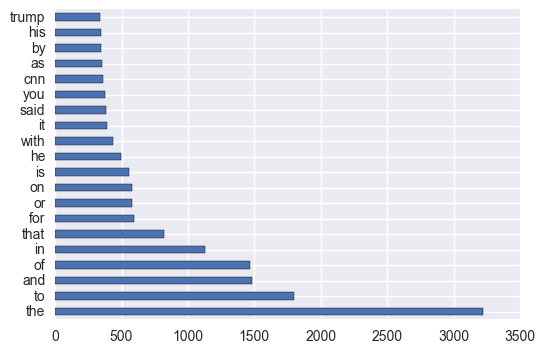

In [31]:
test = df.sum().sort_values(ascending=False)
test.head(20).plot(kind='barh')

In [32]:
df = corpus_drudge.append(corpus)

In [33]:
df

,index,url,outlet,political_view,content_text
0,0,http://cnn.com/2015/08/31/politics/u-s-deploys...,cnn,progressive,"By Tal Kopan and Jim Sciutto, CNN\n\nUpdated 5..."
1,1,http://cnn.com/2015/08/24/politics/donald-trum...,cnn,progressive,"By Chris Frates, CNN\n\nUpdated 9:50 PM ET, Mo..."
2,2,http://cnn.com/2015/08/30/politics/ip-obama-tr...,cnn,progressive,"By John King, CNN Chief National Correspondent..."
3,3,http://cnn.com/2015/09/01/politics/cnn-debate-...,cnn,progressive,"By Mark Preston, CNN\n\nUpdated 6:55 PM ET, Tu..."
4,4,http://cnn.com/2012/08/28/us/gallery/katrina-a...,cnn,progressive,"\nUpdated 9:31 AM ET, Wed August 5, 2015 \nHur..."
5,5,http://cnn.com/2015/09/01/politics/donald-trum...,cnn,progressive,"By Jeremy Diamond, CNN\n\nUpdated 10:49 AM ET,..."
6,6,http://cnn.com/2015/08/31/politics/china-sanct...,cnn,progressive,"By Tal Kopan, CNN\n\nUpdated 7:25 PM ET, Mon A..."
7,7,http://cnn.com/2015/08/29/politics/chris-chris...,cnn,progressive,"By Cassie Spodak and Eugene Scott, CNN\n\nUpda..."
8,8,http://cnn.com/2015/09/01/politics/ash-carter-...,cnn,progressive,"By Eugene Scott and Barbara Starr, CNN\n\nUpda..."
9,9,http://cnn.com/2015/08/31/politics/obama-colum...,cnn,progressive,"By Kevin Liptak, CNN White House Producer\n\nU..."


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 93
Data columns (total 5 columns):
index             478 non-null int64
url               478 non-null object
outlet            478 non-null object
political_view    478 non-null object
content_text      468 non-null object
dtypes: int64(1), object(4)
memory usage: 22.4+ KB


In [35]:
df = df[~df.content_text.isnull()]

In [36]:
test_vectorizer = CountVectorizer(stop_words=None)
X = test_vectorizer.fit_transform(corpus['content_text'])
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
test = df.sum().sort_values(ascending=False)
test.head(20).plot(kind='barh')

TypeError: Empty 'DataFrame': no numeric data to plot

## Anything interesting stand out?

## Examine the class balance

## Check out the top words for each class

## Lets do the same thing with TFIDF -- setup TFIDF

## Subset by class, and plot aggregate TFIDF values with MAX
Plot with great vigor.